### belkacem dounia 




# **TP04  : Réduction de Bruit dans les Images par Filtrage Passe-Bas Exponentiel et Filtre de Wiener**

## **1. Objectif**

L'objectif de ce TP est d'explorer deux techniques de réduction de bruit dans les images numériques :  
1. **Le filtrage passe-bas exponentiel** pour atténuer les hautes fréquences (bruit).  
2. **Le filtre de Wiener**, qui combine des connaissances sur le bruit et le signal pour une restauration optimale.  

Ces méthodes sont appliquées sur une image bruitée par un bruit gaussien.

---

## **2. Méthodologie**

### **2.1. Concepts clés et démarche**

Dans ce TP, on distingue deux approches complémentaires :

- **Le filtrage passe-bas exponentiel** est utilisé pour l’**amélioration** de l’image, en atténuant principalement le bruit haute fréquence tout en préservant les structures globales.
- **Le filtre de Wiener** vise la **restauration** de l’image, en cherchant à inverser les effets de la dégradation (bruit et flou) de façon optimale, en tenant compte des statistiques du bruit et du signal.

Dans les deux cas, le traitement s’effectue dans le **domaine fréquentiel** grâce à la **Transformation de Fourier Discrète (TFD)**, car l’application des filtres y est plus naturelle et efficace.

---

### **2.2. Étapes détaillées**

1. **Ajout de bruit gaussien**  
   Un bruit gaussien est ajouté à l’image originale pour simuler une dégradation réaliste. Le bruit est caractérisé par une moyenne et un écart-type .

2. **Passage dans le domaine fréquentiel (TFD)**  
   L’image bruitée est transformée par la TFD , ce qui permet de représenter son contenu en termes de fréquences spatiales.

3. **Application du filtre**  
   - **Filtre passe-bas exponentiel** (amélioration) :  
     On multiplie le spectre de l’image par la fonction de transfert exponentielle :
     $$
     H(u, v) = e^{-\frac{(u - M/2)^2 + (v - N/2)^2}{2D_0^2}}
     $$
     où \( D_0 \) est la fréquence de coupure.
   - **Filtre de Wiener** (restauration) :  
     On applique le filtre de Wiener, qui utilise la connaissance du bruit et du signal :
     $$
     W(u, v) = \frac{H^*(u, v)}{|H(u, v)|^2 + K}
     $$
     où \( H(u, v) \) est la réponse du filtre passe-bas, \( H^*(u, v) \) sa conjugaison complexe, et \( K \) un paramètre de régularisation.

4. **Retour dans le domaine spatial (TFD inverse)**  
   Après filtrage, on applique la **TFD inverse** pour obtenir l’image traitée dans le domaine spatial, prête à être visualisée et analysée.

5. **Visualisation et analyse**  
   On compare les images bruitées, améliorées (filtre exponentiel) et restaurées (filtre de Wiener) pour différentes valeurs de \( D_0 \) et \( K \).

---

**Résumé visuel du processus :**

1. **Image bruitée**  
   ⬇️  
2. **TFD**  
   ⬇️  
3. **Filtrage (exponentiel pour amélioration, Wiener pour restauration)**  
   ⬇️  
4. **TFD inverse**  
   ⬇️  
5. **Image finale (améliorée ou restaurée)**

---





4. **Visualisation des résultats** :  
   - Comparaison des images bruitées et filtrées pour différentes valeurs de \( D_0 \) (passe-bas) et \( K \) (Wiener).

---

## **3. Résultats**

### **3.1. Image originale et bruitée**

- **Image originale** :  
  L'image originale est une image en niveaux de gris sans bruit.

- **Image bruitée** :  
  Un bruit gaussien  est ajouté à l'image. Cela simule une dégradation typique.

### **3.2. Filtrage passe-bas exponentiel**

- **Paramètres** :  
  Les valeurs de \( D_0 \) utilisées sont : 20, 40, 60.

- **Résultats** :  
  Les images filtrées montrent une réduction progressive du bruit avec l'augmentation de \( D_0 \). Cependant, une valeur trop élevée peut entraîner une perte de détails.

### **3.3. Filtre de Wiener**

- **Paramètres** :  
  Les valeurs de \( K \) utilisées sont : 0.001, 0.01, 0.1.

- **Résultats** :  
  Le filtre de Wiener offre une réduction de bruit plus précise, en tenant compte des caractéristiques du bruit et du signal. Une valeur optimale de \( K \) équilibre la réduction du bruit et la préservation des détails.

---

## **4. Conclusion**

- **Filtrage passe-bas exponentiel** :  
  Réduit efficacement le bruit, mais peut entraîner une perte de détails pour des fréquences de coupure élevées.

- **Filtre de Wiener** :  
  Offre une meilleure restauration en équilibrant réduction de bruit et préservation des détails, grâce à l'utilisation d'un modèle de bruit.





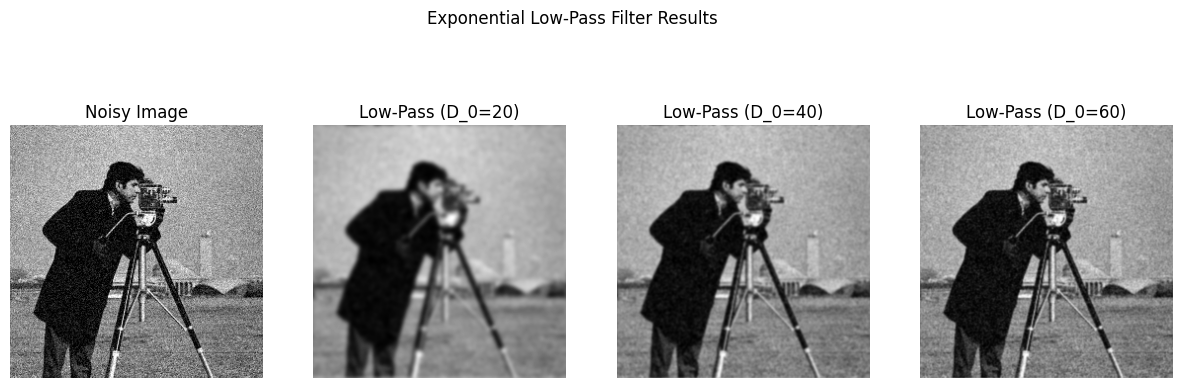

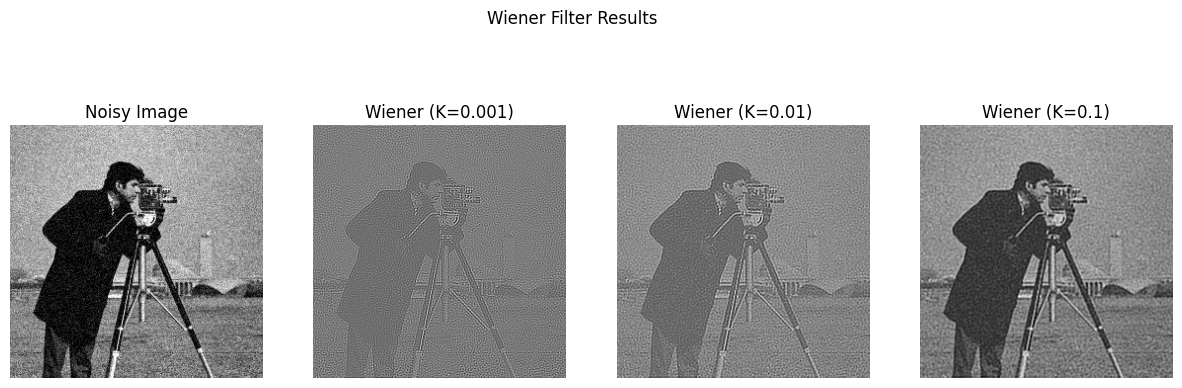

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


image_path = r"C:\Users\DELL\Desktop\tp_tim\pics\cameraman.jpg"
image = Image.open(image_path).convert('L')
image_array = np.array(image)



def add_gaussian_noise(image, mean=0, std=20):
    gaussian_noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + gaussian_noise
    return np.clip(noisy_image, 0, 255).astype(np.uint8)


def apply_exponential_low_pass_filter(image, D_0):
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    M, N = image.shape
    u = np.arange(M).reshape(-1, 1)
    v = np.arange(N)
    U, V = np.meshgrid(u, v, indexing='ij')

    H = np.exp(-((U - M//2)**2 + (V - N//2)**2) / (2 * D_0**2))
    f_filtered_shift = f_shift * H

    f_inverse = np.fft.ifftshift(f_filtered_shift)
    image_filtered_complex = np.fft.ifft2(f_inverse)
    image_filtered = np.real(image_filtered_complex)
    image_filtered_normalized = (image_filtered - np.min(image_filtered)) / (np.max(image_filtered) - np.min(image_filtered))
    return np.uint8(image_filtered_normalized * 255)



def apply_wiener_filter(image, D_0, K):
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)

    M, N = image.shape
    u = np.arange(M).reshape(-1, 1)
    v = np.arange(N)
    U, V = np.meshgrid(u, v, indexing='ij')

    H = np.exp(-((U - M//2)**2 + (V - N//2)**2) / (2 * D_0**2))
    H_conj = np.conj(H)
    H_abs2 = np.abs(H)**2
    wiener_filter = H_conj / (H_abs2 + K)
    f_filtered_shift = f_shift * wiener_filter

    f_inverse = np.fft.ifftshift(f_filtered_shift)
    image_filtered_complex = np.fft.ifft2(f_inverse)
    image_filtered = np.real(image_filtered_complex)
    image_filtered_normalized = (image_filtered - np.min(image_filtered)) / (np.max(image_filtered) - np.min(image_filtered))
    return np.uint8(image_filtered_normalized * 255)




noisy_image = add_gaussian_noise(image_array, mean=0, std=20)


D_0_values = [20, 40, 60] 
K_values = [0.001, 0.01, 0.1] 

# passe-bas exponentiel
filtered_images_expo = [noisy_image]
filtered_titles_expo = ["Noisy Image"]

for D_0 in D_0_values:
    filtered_image = apply_exponential_low_pass_filter(noisy_image, D_0)
    filtered_images_expo.append(filtered_image)
    filtered_titles_expo.append(f"Low-Pass (D_0={D_0})")

#résultat
fig, axes = plt.subplots(1, len(filtered_images_expo), figsize=(15, 5))
for ax, img, title in zip(axes, filtered_images_expo, filtered_titles_expo):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.suptitle("Exponential Low-Pass Filter Results")
plt.show()

#Filtre de Wiener
filtered_images_wiener = [noisy_image]
filtered_titles_wiener = ["Noisy Image"]

for K in K_values:
    filtered_image = apply_wiener_filter(noisy_image, D_0=40, K=K)
    filtered_images_wiener.append(filtered_image)
    filtered_titles_wiener.append(f"Wiener (K={K})")

#résultat
fig, axes = plt.subplots(1, len(filtered_images_wiener), figsize=(15, 5))
for ax, img, title in zip(axes, filtered_images_wiener, filtered_titles_wiener):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
plt.suptitle("Wiener Filter Results")
plt.show()